In [94]:
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import random
import seaborn as sns
from collections import Counter
%matplotlib inline

In [10]:
df = pd.read_table("blast_output.tsv", 
                   names=['query_id', 'subject_id','perc_identity', 'alignment_length', 'mismatches', 'gaps', 'qstart','qend','sstart', 'send', 'evalue','score'])

In [9]:
df.head()

,query_id,subject_id,perc_identity,alignment_length?,mismatches,gaps,qstart,qend,sstart,send,evalue,score
0,k99_256,gi|55771382|dbj|AP008226.1|,81.262,523,89,6,1,516,132178,132698,1.450000e-116,414.0
1,k99_256,gi|55771382|dbj|AP008226.1|,81.262,523,89,6,1,516,1633827,1633307,1.450000e-116,414.0
2,k99_719,gi|55771382|dbj|AP008226.1|,99.826,1149,2,0,1,1149,1411524,1412672,0.000000e+00,2111.0
3,k99_5583,gi|55771382|dbj|AP008226.1|,99.242,264,2,0,1,264,1778525,1778788,9.000000e-136,477.0
4,k99_6632,gi|55771382|dbj|AP008226.1|,86.957,92,12,0,16257,16348,1690580,1690489,1.470000e-21,104.0


In [12]:
len(df)

27428

In [17]:
len(df[df['perc_identity'] >= 100.0])

3375

In [18]:
df[df['perc_identity'] >= 100.0].head()

,query_id,subject_id,perc_identity,alignment_length,mismatches,gaps,qstart,qend,sstart,send,evalue,score
6,k99_7933,gi|55771382|dbj|AP008226.1|,100.0,30,0,0,4940,4969,1180617,1180646,1.210000e-07,56.5
20,k99_56443,gi|55771382|dbj|AP008226.1|,100.0,210,0,0,1,210,870729,870520,3.380000e-109,388.0
27,k99_60579,gi|55771382|dbj|AP008226.1|,100.0,1031,0,0,1,1031,24581,25611,0.000000e+00,1905.0
71,k99_111173,gi|55771382|dbj|AP008226.1|,100.0,520,0,0,1,520,1288119,1288638,0.000000e+00,961.0
90,k99_128067,gi|55771382|dbj|AP008226.1|,100.0,555,0,0,1,555,567098,567652,0.000000e+00,1026.0


In [56]:
df[(df['perc_identity'] >= 99.0) & (df['alignment_length'] >= 3000.0)]

,query_id,subject_id,perc_identity,alignment_length,mismatches,gaps,qstart,qend,sstart,send,evalue,score
1164,k99_1507000,gi|55771382|dbj|AP008226.1|,99.924,3972,3,0,1,3972,903834,907805,0.0,7319.0
1606,k99_1951853,gi|55771382|dbj|AP008226.1|,99.808,3119,5,1,1,3118,1161821,1158703,0.0,5725.0
2145,k99_2654327,gi|55771382|dbj|AP008226.1|,99.902,3047,2,1,1,3046,603643,606689,0.0,5609.0
2170,k99_2680603,gi|55771382|dbj|AP008226.1|,99.904,3117,3,0,1,3117,243065,239949,0.0,5740.0
2537,k99_3235331,gi|55771382|dbj|AP008226.1|,99.895,4780,2,3,1,4777,558022,553243,0.0,8796.0
2799,k99_3601836,gi|55771382|dbj|AP008226.1|,99.877,3255,3,1,1,3254,419334,422588,0.0,5987.0
2941,k99_3767578,gi|55771382|dbj|AP008226.1|,100.000,3053,0,0,1,3053,1272524,1269472,0.0,5638.0
3568,k99_4681679,gi|55771382|dbj|AP008226.1|,99.882,3393,4,0,1,3393,301588,304980,0.0,6244.0
3614,k99_4762994,gi|55771382|dbj|AP008226.1|,99.950,4009,2,0,1,4009,615450,611442,0.0,7393.0
4111,k99_5467329,gi|55771382|dbj|AP008226.1|,99.817,3835,7,0,1,3835,799433,803267,0.0,7044.0


In [52]:
df[(df['perc_identity'] >= 100.0) & (df['alignment_length'] >= 1000.0)].head()[['sstart', 'send']]

,sstart,send
27,24581,25611
103,780571,781582
280,233152,234946
289,1604563,1605635
516,139901,138565


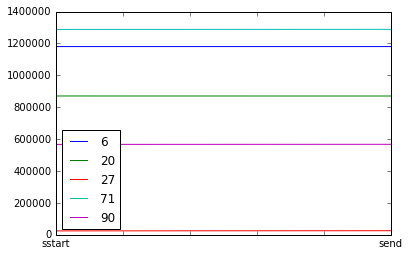

In [40]:
df[df['perc_identity'] >= 100.0].head()[['sstart', 'send']].T.plot()

[1180617 1180646] [0.8243121458218696, 0.8243121458218696]
[870729 870520] [0.43821027608175467, 0.43821027608175467]
[24581 25611] [0.9672504027716083, 0.9672504027716083]
[1288119 1288638] [0.28852063335487665, 0.28852063335487665]
[567098 567652] [0.009005655051682271, 0.009005655051682271]


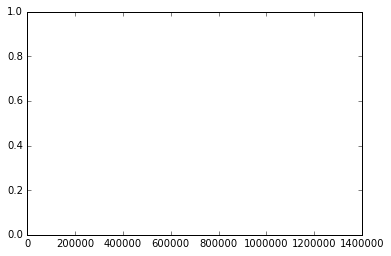

In [51]:
for ix, row in df[df['perc_identity'] >= 100.0].head().iterrows():
    x = row[['sstart', 'send']].values
    y_val = random.random()
    y = [y_val,y_val]
    plt.plot(x,y)
    print(x,y)

[903834 907805] [0.5096018668186455, 0.5096018668186455]
[1161821 1158703] [0.19317333886176635, 0.19317333886176635]
[603643 606689] [0.2680516580977912, 0.2680516580977912]
[243065 239949] [0.6888066809155683, 0.6888066809155683]
[558022 553243] [0.752577396022226, 0.752577396022226]
[419334 422588] [0.8045444097171172, 0.8045444097171172]
[1272524 1269472] [0.04459077907617037, 0.04459077907617037]
[301588 304980] [7.096835511977151e-05, 7.096835511977151e-05]
[615450 611442] [0.5376890347445594, 0.5376890347445594]
[799433 803267] [0.9457081868763593, 0.9457081868763593]
[890025 893159] [0.5104124835155205, 0.5104124835155205]
[966165 962615] [0.6413695747006587, 0.6413695747006587]
[656103 652648] [0.524586807461081, 0.524586807461081]
[897635 900756] [0.6261587215015847, 0.6261587215015847]
[880515 877469] [0.6967779544199028, 0.6967779544199028]


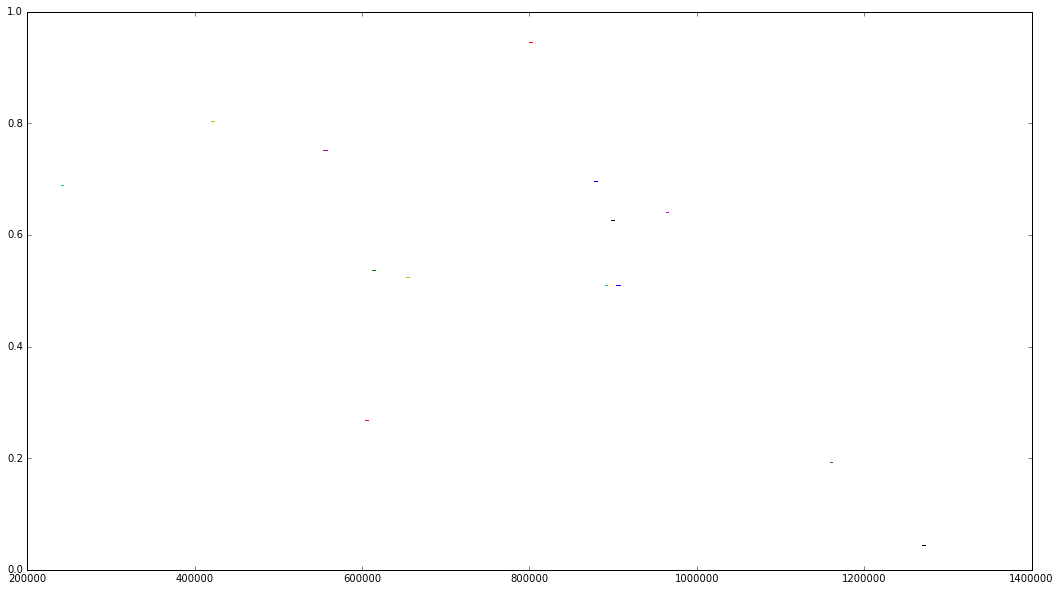

In [69]:
plt.figure(num=None, figsize=(18, 10), dpi=80)
for ix, row in df[(df['perc_identity'] >= 99.0) & (df['alignment_length'] >= 3000.0)].iterrows():
    x = row[['sstart', 'send']].values
    y_val = random.random()
    y = [y_val,y_val]
    plt.plot(x,y)
    print(x,y)


In [62]:
df['subject_id'].unique()

array(['gi|55771382|dbj|AP008226.1|', 'gi|55773356|dbj|AP008227.1|',
       'gi|55773608|dbj|AP008228.1|'], dtype=object)

(-1, 2)

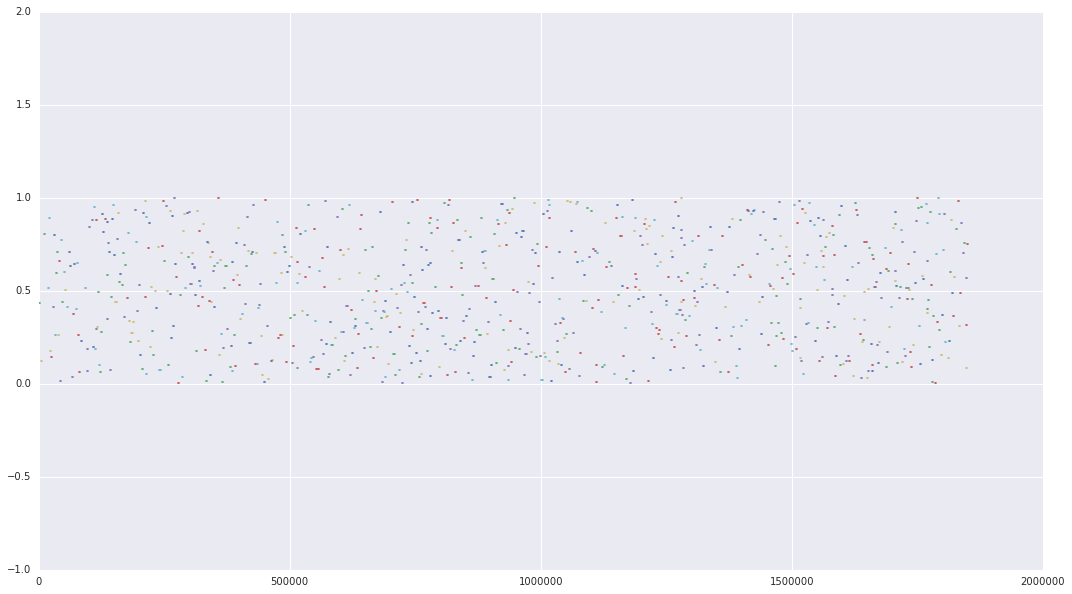

In [72]:
fig = plt.figure(num=None, figsize=(18, 10), dpi=80)
ax = fig.add_subplot(1,1,1)
for ix, row in df[(df['perc_identity'] >= 99.0) & (df['subject_id'] == 'gi|55771382|dbj|AP008226.1|')].iterrows():
    x = row[['sstart', 'send']].values
    y_val = random.random()
    y = [y_val,y_val]
    plt.plot(x,y)
ax.set_ylim([-1,2])

(-1, 200)

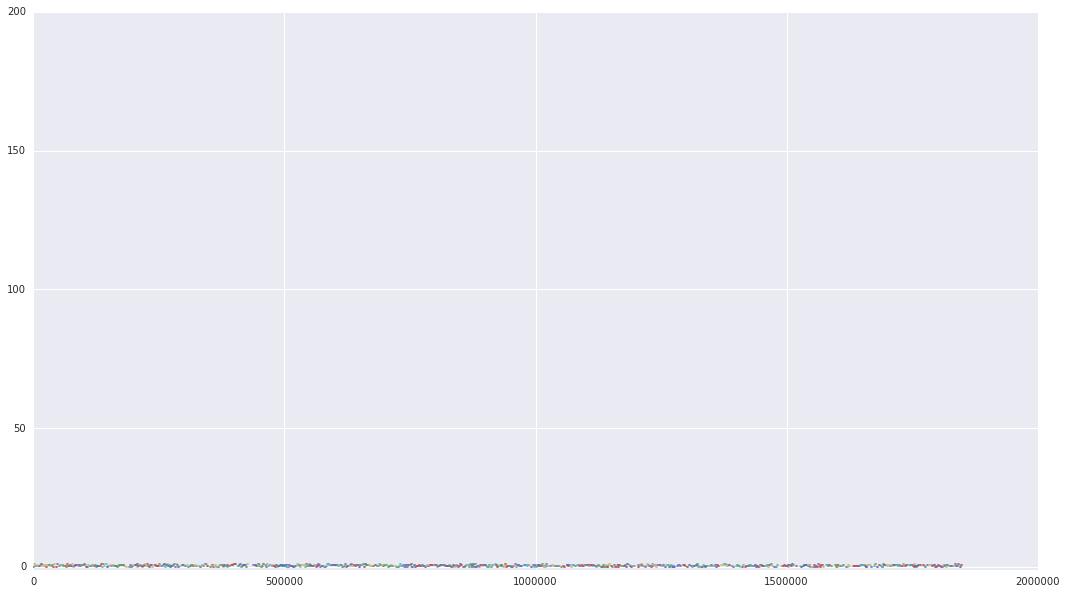

In [74]:
fig = plt.figure(num=None, figsize=(18, 10), dpi=80)
ax = fig.add_subplot(1,1,1)
for ix, row in df[(df['perc_identity'] >= 99.0) & (df['subject_id'] == 'gi|55771382|dbj|AP008226.1|')].iterrows():
    x = row[['sstart', 'send']].values
    y_val = random.random()
    y = [y_val,y_val]
    plt.plot(x,y)
ax.set_ylim([-1,200])

(-1, 20)

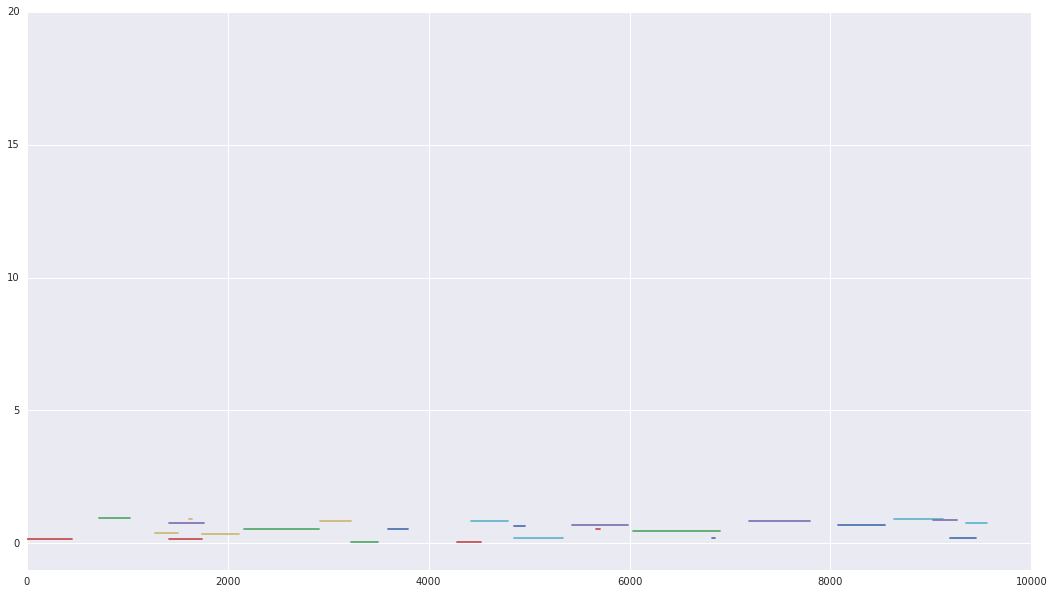

In [81]:
fig = plt.figure(num=None, figsize=(18, 10), dpi=80)
ax = fig.add_subplot(1,1,1)
for ix, row in df[(df['perc_identity'] >= 99.0) & (df['subject_id'] == 'gi|55771382|dbj|AP008226.1|') & (df['sstart'] < 10000)].iterrows():
    x = row[['sstart', 'send']].values
    y_val = random.random()
    y = [y_val,y_val]
    plt.plot(x,y)
ax.set_ylim([-1,20])

(-1, 20)

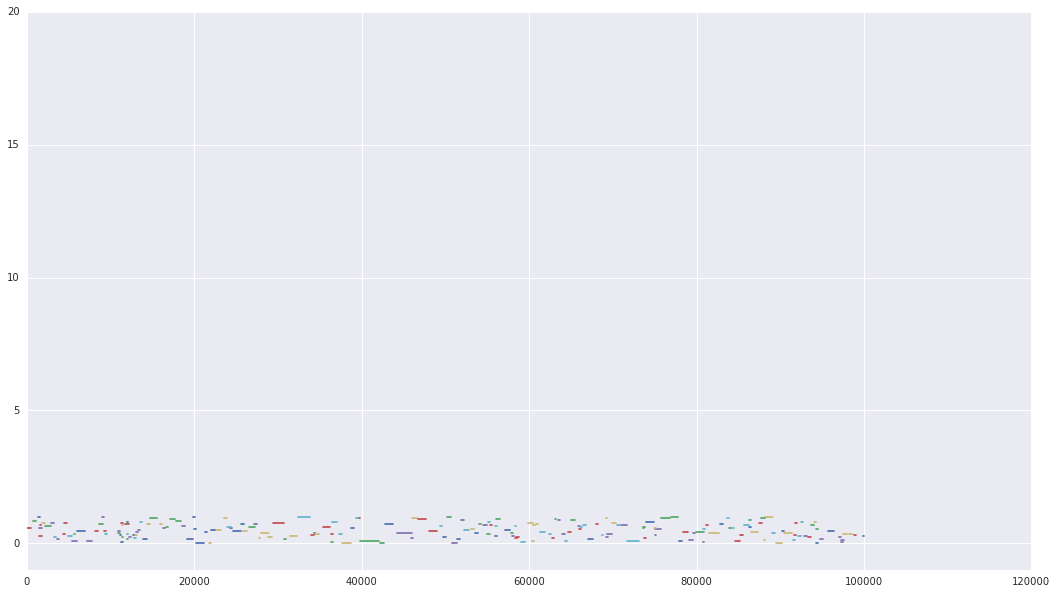

In [82]:
fig = plt.figure(num=None, figsize=(18, 10), dpi=80)
ax = fig.add_subplot(1,1,1)
for ix, row in df[(df['perc_identity'] >= 99.0) & (df['subject_id'] == 'gi|55771382|dbj|AP008226.1|') & (df['sstart'] < 100000)].iterrows():
    x = row[['sstart', 'send']].values
    y_val = random.random()
    y = [y_val,y_val]
    plt.plot(x,y)
ax.set_ylim([-1,20])

In [88]:
c = Counter()
c.update(range(200,100))

In [90]:
base_count = Counter()
for ix, row in df[(df['perc_identity'] >= 99.0) & (df['subject_id'] == 'gi|55771382|dbj|AP008226.1|') & (df['sstart'] < 10000)].iterrows():
    x = row[['sstart', 'send']].values
    start = x[0]
    stop = x[1]
    if start > stop:
        base_count.update(range(stop, start))
    else:
        base_count.update(range(start, stop))

In [91]:
len(base_count.keys())

7556

In [96]:
for subject_id in df['subject_id'].unique():
    base_count = Counter()
    for ix, row in df[(df['perc_identity'] >= 99.0) & (df['subject_id'] == subject_id)].iterrows():
        x = row[['sstart', 'send']].values
        start = x[0]
        stop = x[1]
        if start > stop:
            base_count.update(range(stop, start))
        else:
            base_count.update(range(start, stop))
    print(len(base_count))

1541966
217829
6000


In [97]:
1541966+217829+6000

1765795

In [98]:
for subject_id in df['subject_id'].unique():
    base_count = Counter()
    for ix, row in df[(df['perc_identity'] >= 98.0) & (df['subject_id'] == subject_id)].iterrows():
        x = row[['sstart', 'send']].values
        start = x[0]
        stop = x[1]
        if start > stop:
            base_count.update(range(stop, start))
        else:
            base_count.update(range(start, stop))
    print(len(base_count))

1547917
219208
6050


In [99]:
1765795.0/2116059

0.8344734244177502

In [100]:
for subject_id in df['subject_id'].unique():
    base_count = Counter()
    for ix, row in df[(df['perc_identity'] >= 90.0) & (df['subject_id'] == subject_id)].iterrows():
        x = row[['sstart', 'send']].values
        start = x[0]
        stop = x[1]
        if start > stop:
            base_count.update(range(stop, start))
        else:
            base_count.update(range(start, stop))
    print(len(base_count))

1553468
220770
6269


In [101]:
1553468+220770+6269

1780507

In [102]:
1780507.0/2116059

0.8414259715820778

In [104]:
len(df[(df['perc_identity'] >= 99.0)])

5505